# **Tarea 4**

## **Parte 1: Filtro mediante SelectKBest**

In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import r_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [109]:
# Carga de datos
trans=pd.read_csv('C:/Users/sandy/Downloads/trans_vf_2.csv')
# cambiamos el tipo de dato a datetime
trans['Timestamp'] = pd.to_datetime(trans['Timestamp'])


In [110]:
#trans.timestamp = trans.timestamp.values.astype(np.int64) / 10 ** 9
trans['Timestamp']=trans['Timestamp'].astype('int64')/10**9


In [111]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147470 entries, 0 to 1147469
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Timestamp        1147470 non-null  float64
 1   From Bank        1147470 non-null  int64  
 2   From_Acc         1147470 non-null  int64  
 3   To Bank          1147470 non-null  int64  
 4   To_Acc           1147470 non-null  int64  
 5   Amount Received  1147470 non-null  float64
 6   R_CCY            1147470 non-null  int64  
 7   Amount Paid      1147470 non-null  float64
 8   P_CCY            1147470 non-null  int64  
 9   Payment_Format   1147470 non-null  int64  
 10  Is Laundering    1147470 non-null  int64  
 11  Monto_USD        1147470 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 105.1 MB


In [112]:
# X es ula matriz de variables predictoras y y la variable respuesta
x=trans.drop(trans.columns[10], axis=1)
y=trans['Is Laundering']

# se crea objeto SelectKBest con una función de puntuación (f_classif)
k_best = SelectKBest(score_func=f_classif, k=5)  # el valor de 'k' se ajusta

# fit y transform
X_new = k_best.fit(x, y)

#características seleccionadas
selected_features = k_best.get_support(indices=True)

print("Variables seleccionadas:", selected_features)


Variables seleccionadas: [ 0  1  3  9 10]


## **Parte 2: Modelos de selección de variables**

### Métodos de Filtro

#### ANOVA de valor F

Dado que el modelo busca clasificar, se utiliza la función f_classif de sklearn.feature_selection.

In [113]:
f_value = f_classif(x, y)
# Regresa arreglo de estadístico F y valor p
f_value

(array([4.63130757e+02, 7.61264666e+00, 2.81707916e-01, 6.24763252e+01,
        7.67308719e-01, 9.37703674e-03, 4.70231356e-02, 7.12585264e-03,
        4.90505541e-02, 4.30189701e+03, 5.39444096e+00]),
 array([1.04946170e-102, 5.79612689e-003, 5.95584070e-001, 2.69903672e-015,
        3.81051095e-001, 9.22857366e-001, 8.28326697e-001, 9.32726683e-001,
        8.24723732e-001, 0.00000000e+000, 2.02011696e-002]))

In [114]:
pass_test = []
not_pass_test = []
a = 0.05
for i in range(len(f_value[1])):
    print(x.columns[i], f_value[1][i])
    if f_value[1][i] < a:
        pass_test.append(x.columns[i])
    else:
        not_pass_test.append(x.columns[i])

print("\nPasaron: ",pass_test)
print("No pasaron: ", not_pass_test)

Timestamp 1.0494617003102254e-102
From Bank 0.005796126887115196
From_Acc 0.5955840697115589
To Bank 2.699036717247973e-15
To_Acc 0.38105109483797617
Amount Received 0.9228573656678265
R_CCY 0.8283266970227974
Amount Paid 0.9327266829606258
P_CCY 0.8247237320515614
Payment_Format 0.0
Monto_USD 0.02020116964954267

Pasaron:  ['Timestamp', 'From Bank', 'To Bank', 'Payment_Format', 'Monto_USD']
No pasaron:  ['From_Acc', 'To_Acc', 'Amount Received', 'R_CCY', 'Amount Paid', 'P_CCY']


In [115]:
results= pd.DataFrame(f_value[0], index=x.columns)
results.columns = ['f_value']

results

,f_value
Timestamp,463.130757
From Bank,7.612647
From_Acc,0.281708
To Bank,62.476325
To_Acc,0.767309
Amount Received,0.009377
R_CCY,0.047023
Amount Paid,0.007126
P_CCY,0.049051
Payment_Format,4301.897007


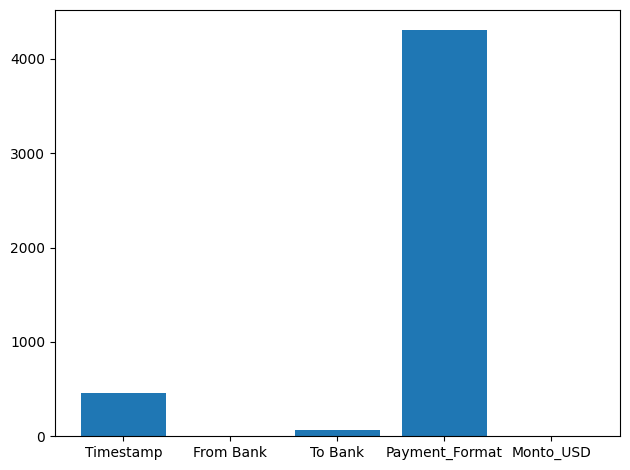

In [116]:

plt.figure()
plt.bar(results.drop(not_pass_test).index, results.drop(not_pass_test).f_value)
plt.tight_layout()
plt.show()

La forma de pago es la variable más relacionada con la variable respuesta 'Is Laundering', seguida de fecha y hora.

#### Valor R de Correlación

In [117]:
r_value = r_regression(x, y)
r_value

array([ 2.00859990e-02,  2.57570490e-03,  4.95483481e-04, -7.37862814e-03,
       -8.17738847e-04, -9.03987688e-05,  2.02434951e-04, -7.88039752e-05,
        2.06752922e-04, -6.11149052e-02,  2.16821283e-03])

In [118]:
results['r_value'] = r_value
colors = []
for v in results['r_value']:
    if v > 0:
        colors.append('g')
    else:
        colors.append('r')

results['r_value_abs'] = results['r_value'].abs()
results


,f_value,r_value,r_value_abs
Timestamp,463.130757,0.020086,0.020086
From Bank,7.612647,0.002576,0.002576
From_Acc,0.281708,0.000495,0.000495
To Bank,62.476325,-0.007379,0.007379
To_Acc,0.767309,-0.000818,0.000818
Amount Received,0.009377,-0.000090,0.000090
R_CCY,0.047023,0.000202,0.000202
Amount Paid,0.007126,-0.000079,0.000079
P_CCY,0.049051,0.000207,0.000207
Payment_Format,4301.897007,-0.061115,0.061115


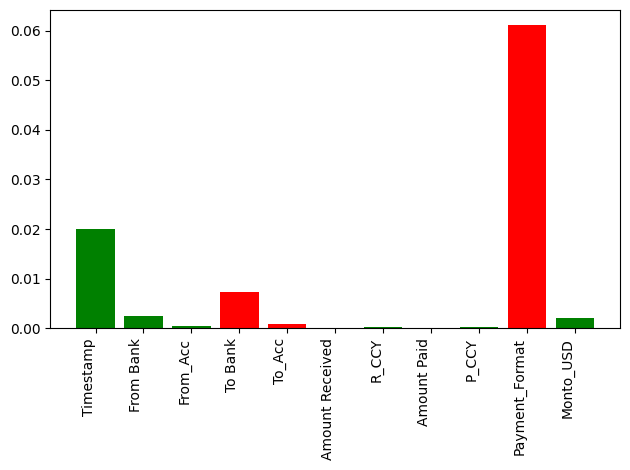

In [119]:
plt.figure()
plt.bar(results.index, results.r_value_abs, color = colors)
plt.xticks(rotation = 90, ha = 'right')
plt.tight_layout()
plt.show()

Las correlaciones son bajas, aquella variable con la más alta es la del monto pagado, la cual no ha salido en los modelos anteriores.

#### Umbral de varianzas.

Primero se normalizan las variables para que se cumplan los supuestos del modelo.

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled.head()

,Timestamp,From Bank,From_Acc,To Bank,To_Acc,Amount Received,R_CCY,Amount Paid,P_CCY,Payment_Format,Monto_USD
0,0.000851,0.000025,0.857061,0.000025,0.857083,3.827738e-09,0.571429,3.827738e-09,0.571429,0.833333,3.171283e-07
1,0.000085,0.000031,0.471456,0.000031,0.471457,2.905967e-09,0.571429,2.905967e-09,0.571429,0.833333,2.407595e-07
2,0.000255,0.000025,0.982102,0.000025,0.982130,3.797671e-08,0.571429,3.797671e-08,0.571429,0.833333,3.146372e-06
3,0.001106,0.000031,0.610075,0.006899,0.038115,7.930153e-12,0.571429,7.930153e-12,0.571429,0.666667,6.570078e-10
4,0.000723,0.000025,0.179660,0.102026,0.259979,1.104631e-10,0.571429,1.104631e-10,0.571429,0.666667,9.151868e-09


In [121]:
from sklearn.feature_selection import VarianceThreshold

In [122]:
selector = VarianceThreshold()
selector.fit_transform(x_scaled)

# Se agregan las varianzas a los resultados
results['variance'] = selector.variances_

results


,f_value,r_value,r_value_abs,variance
Timestamp,463.130757,0.020086,0.020086,3.459400e-02
From Bank,7.612647,0.002576,0.002576,2.283661e-02
From_Acc,0.281708,0.000495,0.000495,8.014676e-02
To Bank,62.476325,-0.007379,0.007379,3.777908e-02
To_Acc,0.767309,-0.000818,0.000818,8.266384e-02
Amount Received,0.009377,-0.000090,0.000090,9.496826e-07
R_CCY,0.047023,0.000202,0.000202,4.687755e-02
Amount Paid,0.007126,-0.000079,0.000079,9.469894e-07
P_CCY,0.049051,0.000207,0.000207,4.665855e-02
Payment_Format,4301.897007,-0.061115,0.061115,5.904994e-02


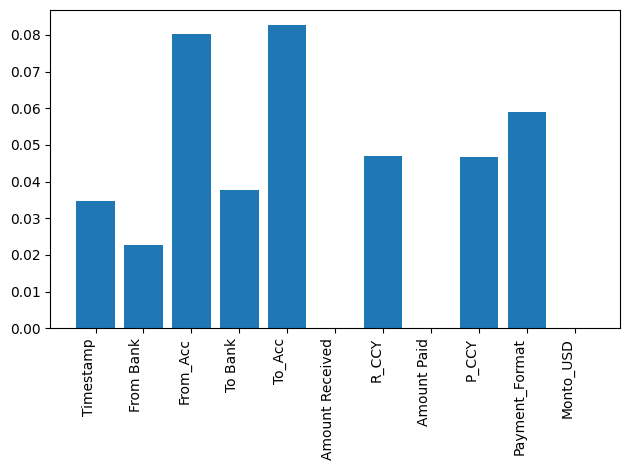

In [123]:
plt.figure()
plt.bar(results.index, results.variance)
plt.xticks(rotation = 90, ha = 'right')
plt.tight_layout()
plt.show()

Bajo este modelo, ninguna variable sería considerada ya que tienen varianza menor a 0.2.

#### Información mutua.

Se utilizará la información mutua de clasificación. Ésta ayuda a identificar las características más informativas para predecir el objetivo. A mayor valor de información mutua, mayor información brinda la característica.

In [124]:
from sklearn.feature_selection import mutual_info_classif


In [125]:
mi = mutual_info_classif(x, y, random_state=0)

#se agrega al dataframe de resultados
results['mi'] = mi

results

,f_value,r_value,r_value_abs,variance,mi
Timestamp,463.130757,0.020086,0.020086,3.459400e-02,0.001110
From Bank,7.612647,0.002576,0.002576,2.283661e-02,0.000412
From_Acc,0.281708,0.000495,0.000495,8.014676e-02,0.001230
To Bank,62.476325,-0.007379,0.007379,3.777908e-02,0.000519
To_Acc,0.767309,-0.000818,0.000818,8.266384e-02,0.001371
Amount Received,0.009377,-0.000090,0.000090,9.496826e-07,0.000736
R_CCY,0.047023,0.000202,0.000202,4.687755e-02,0.046370
Amount Paid,0.007126,-0.000079,0.000079,9.469894e-07,0.000755
P_CCY,0.049051,0.000207,0.000207,4.665855e-02,0.046777
Payment_Format,4301.897007,-0.061115,0.061115,5.904994e-02,0.088948


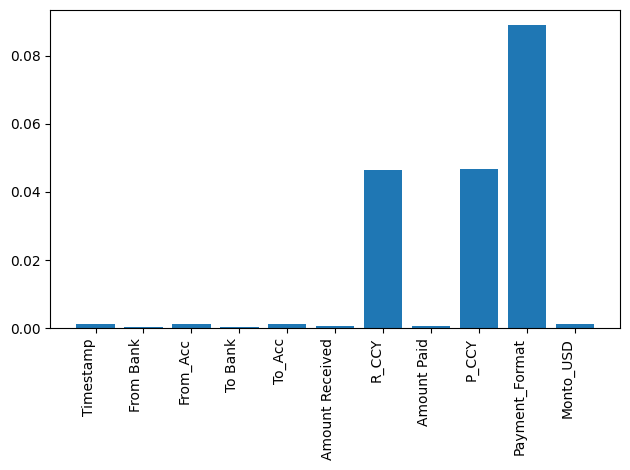

In [126]:
plt.figure()
plt.bar(results.index, results.mi)
plt.xticks(rotation = 90, ha = 'right')
plt.tight_layout()
plt.show()

La dependencia entre las variables es débil.

### Wrapper Methods

In [137]:
from sklearn.decomposition import PCA
import numpy as np

In [141]:
pca = PCA(n_components = 4)
pca_model = pca.fit(x_scaled)

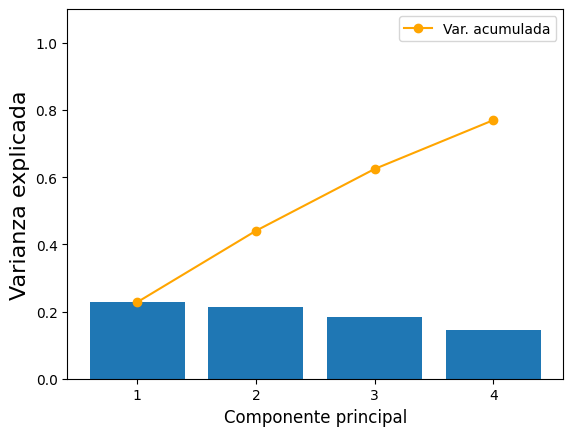

In [143]:
plt.figure()
plt.bar(np.arange(pca_model.n_components_) + 1, pca_model.explained_variance_ratio_)
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
plt.plot(range(1, 5),prop_varianza_acum, marker = 'o', c='orange', label='Var. acumulada')
plt.xticks(np.arange(pca_model.n_components_) + 1)
plt.ylim(0, 1.1)
plt.xlabel('Componente principal', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=16)
plt.legend()
plt.show()

In [144]:
# Coeficientes del PCA
pca_coef = pd.DataFrame(
  data    = pca_model.components_,
  columns = x_scaled.columns,
  index = ['pca1', 'pca2', 'pca3', 'pca4']
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2,pca3,pca4
Payment_Format,0.048895,0.005114,0.004411,-0.985226
To Bank,0.035717,0.000338,-0.002626,0.068658
From Bank,0.033551,0.005148,-0.002793,0.033218
Amount Paid,-0.000004,-0.000004,0.000003,0.000013
Amount Received,-0.000004,-0.000003,0.000004,0.000015
Monto_USD,-0.000008,-0.000003,0.000007,0.000047
Timestamp,-0.004859,0.001492,-0.001412,0.146303
To_Acc,-0.022461,0.781446,-0.623544,-0.000402
From_Acc,-0.086765,0.619834,0.779900,0.002693
P_CCY,-0.701729,-0.050289,-0.038124,-0.032437


Se requieren más de cuatro componentes principales para explicar cerca del 80% de la varianza de los datos.

#### Tree-Based Feature Importance

##### XGBoost

Es un algoritmo de árbol de decisión, los cuales pueden proporcionar una medida de importancia de las características a evaluar. Mientras que los algoritmos de Bagging entrenan árboles de decisión en paralelo, los algoritmos de Boosting lo hacen en serie, tal que cada modelo se basa en los errores de su predecesor, intentando corregirlos. El modelo final es una colección de aprendizajes débiles entrenados con los residuos de aprendizajes fuertes para formar la predicción final.[1](https://www.qwak.com/post/xgboost-versus-random-forest#:~:text=Random%20Forest%20is%20a%20bagging,and%20determine%20the%20final%20output.)

In [127]:
import xgboost as xgb

# se crea un clasificador de XGBoost
clf = xgb.XGBClassifier()

# ajuste (fit) del modelo al conjunto de datos
clf.fit(x, y)

# importancia de las características
importances = clf.feature_importances_

for feature, importance in enumerate(importances):
    print(f'Característica {feature}: {importance}')

Característica 0: 0.04134417697787285
Característica 1: 0.03714882582426071
Característica 2: 0.023427071049809456
Característica 3: 0.02846631594002247
Característica 4: 0.022630181163549423
Característica 5: 0.02648339793086052
Característica 6: 0.031184600666165352
Característica 7: 0.023923013359308243
Característica 8: 0.051798492670059204
Característica 9: 0.6505789160728455
Característica 10: 0.06301513314247131


In [128]:
# Se agregan las varianzas a los resultados
results['rgboost'] = importances
results

,f_value,r_value,r_value_abs,variance,mi,rgboost
Timestamp,463.130757,0.020086,0.020086,3.459400e-02,0.001110,0.041344
From Bank,7.612647,0.002576,0.002576,2.283661e-02,0.000412,0.037149
From_Acc,0.281708,0.000495,0.000495,8.014676e-02,0.001230,0.023427
To Bank,62.476325,-0.007379,0.007379,3.777908e-02,0.000519,0.028466
To_Acc,0.767309,-0.000818,0.000818,8.266384e-02,0.001371,0.022630
Amount Received,0.009377,-0.000090,0.000090,9.496826e-07,0.000736,0.026483
R_CCY,0.047023,0.000202,0.000202,4.687755e-02,0.046370,0.031185
Amount Paid,0.007126,-0.000079,0.000079,9.469894e-07,0.000755,0.023923
P_CCY,0.049051,0.000207,0.000207,4.665855e-02,0.046777,0.051798
Payment_Format,4301.897007,-0.061115,0.061115,5.904994e-02,0.088948,0.650579


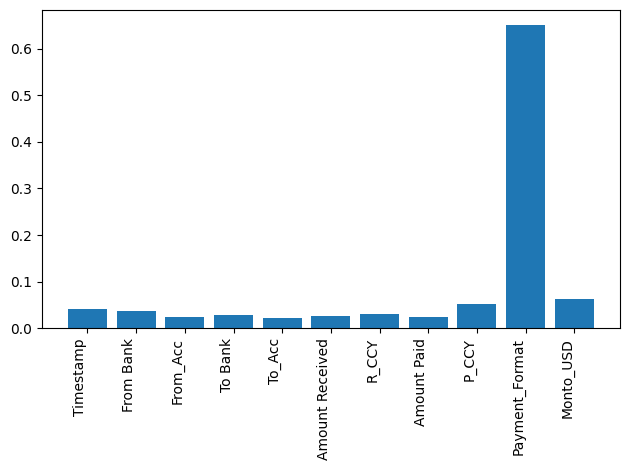

In [129]:
plt.figure()
plt.bar(results.index, results.rgboost)
plt.xticks(rotation = 90, ha = 'right')
plt.tight_layout()
plt.show()

##### Conclusiones.

De los análisis realizados y de acuerdo con el último modelo utilizado, la variable 'Payment_Format' es aquella que brinda más información que el resto de las variables para determinar la clasificación de la transacción. Asimismo, y aunque en menor medida, las variables 'Monto_USD' , 'P_CCY', 'From Bank' y 'Timestamp' también aportan un poco más que el resto de las variables.

Del análisis de correlación, la moneda y montos de recepción y de pago aportan información similar, por lo que los montos y la moneda de recepción serán excluidas de las primeras pruebas del modelo, y en caso de que su desempeño sea muy malo se valorará su integración en búsqueda de mejorarlo.

#### Referencias

https://www.qwak.com/post/xgboost-versus-random-forest#:~:text=Random%20Forest%20is%20a%20bagging,and%20determine%20the%20final%20output.
https://xgboost.readthedocs.io/en/stable/python/python_intro.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

